In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image,display

In [2]:
#X and Z will have the real data and generated data respectlvely

X = tf.placeholder(tf.float32, shape=[None, 784])
Z = tf.placeholder(tf.float32, shape=[None, 100])

In [3]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return


Here is the small network

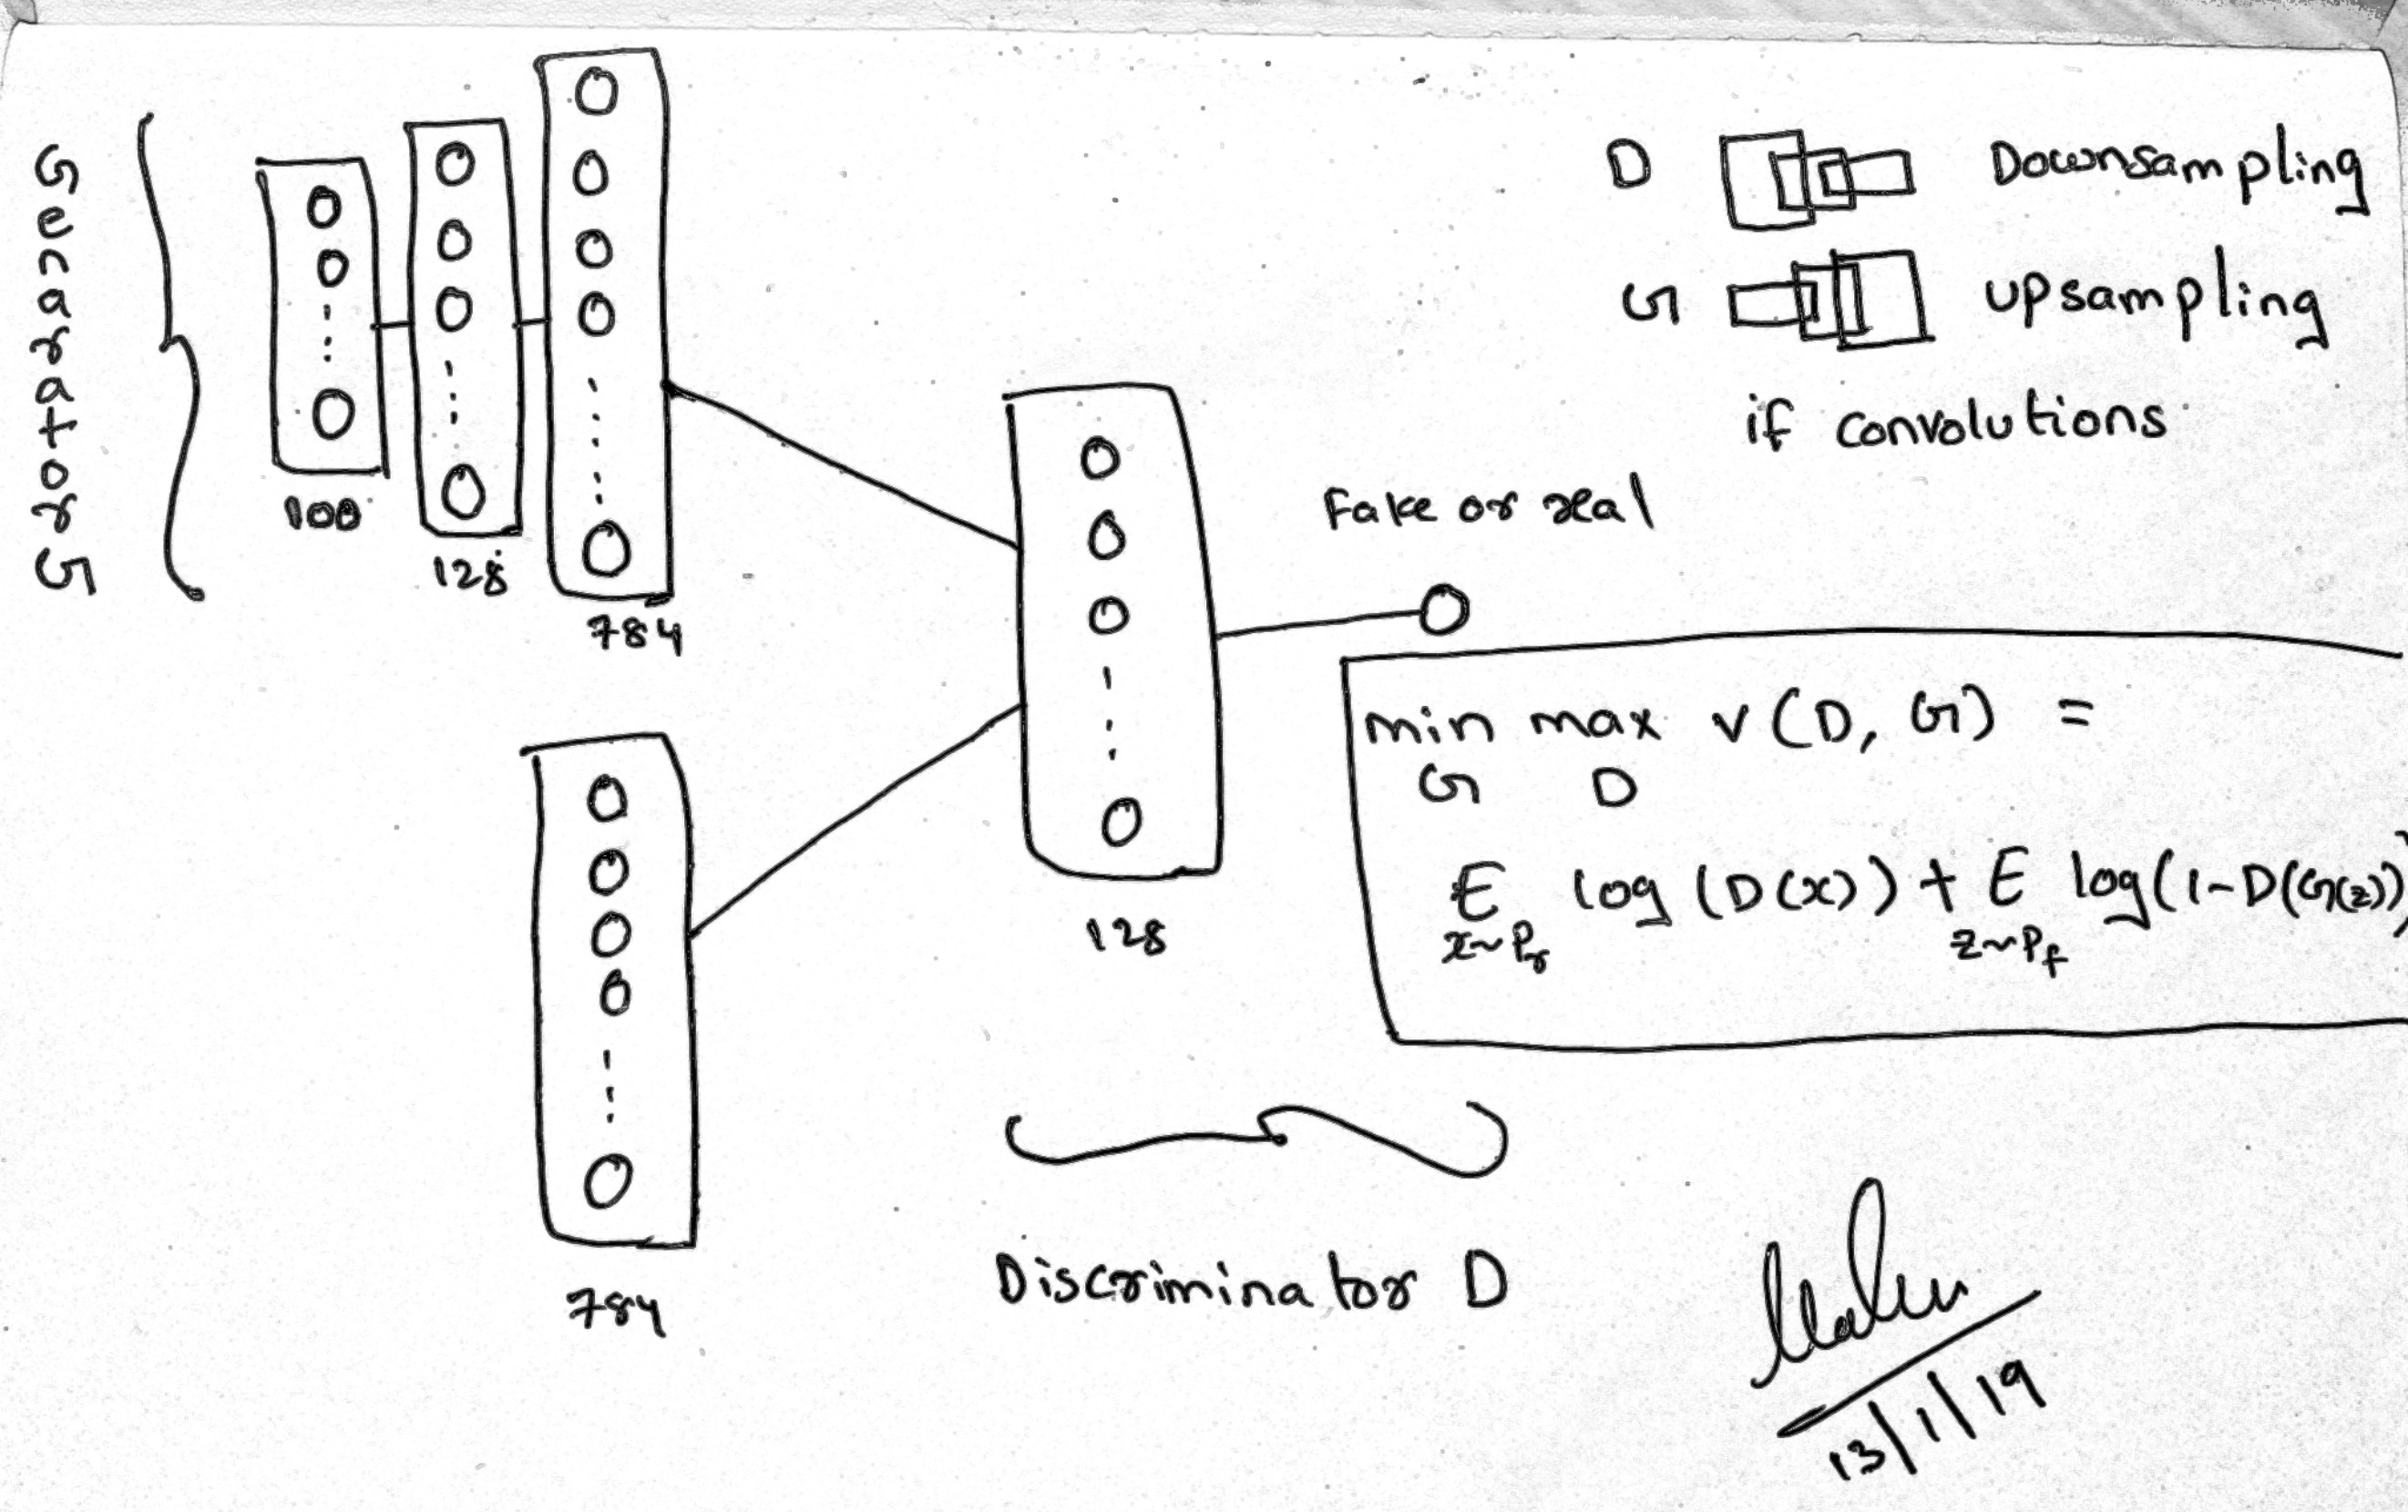

In [4]:
display(Image("vannilla_GAN_network.jpg"))

In [5]:
def generator(z):
    
    with tf.variable_scope("generator"):
        
        init = tf.contrib.layers.xavier_initializer()
        h1 = tf.layers.dense(inputs=z,units=128,activation=tf.nn.relu, kernel_initializer=init,use_bias=True)
        out = tf.layers.dense(inputs=h1,units=784,activation=tf.nn.tanh, kernel_initializer=init,use_bias=True)         

        return out

def discriminator(x):
    
    with tf.variable_scope("discriminator",reuse=tf.AUTO_REUSE):
        
        init = tf.contrib.layers.xavier_initializer()
        h1 = tf.layers.dense(inputs=x,units=128,activation=tf.nn.relu, kernel_initializer=init,use_bias=True)
        logits = tf.layers.dense(inputs=h1,units=1, kernel_initializer=init,use_bias=True)

        return logits

In [6]:
def sample_Z(r, c):
    return np.random.uniform(-1., 1., size=[r, c])

In [7]:
G_sample = generator(Z)
logits_real = discriminator(X)
logits_fake = discriminator(G_sample)

In [8]:
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_real),
                                                                     logits=logits_real))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(logits_fake),
                                                                     logits=logits_fake))
D_loss = D_loss_real +D_loss_fake

G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_fake),
                                                                logits=logits_fake))

In [9]:
# Actual loss code for the equations but above is the better version 

D_real = tf.nn.sigmoid(logits_real)
D_fake = tf.nn.sigmoid(logits_fake)

D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

In [10]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator') 

In [11]:
D_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(D_loss, var_list=D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(G_loss, var_list=G_vars)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Initial generated images


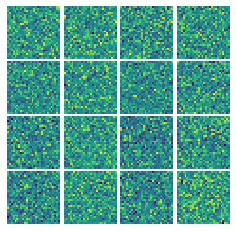

In [14]:
print("Initial generated images")
samples = sess.run(G_sample,feed_dict={Z: sample_Z(128, 100)})
fig = show_images(samples[:16])
plt.show()
print()

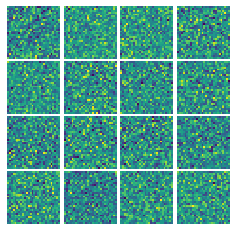


Iter: 0
D loss: 1.362
G_loss: 0.8435



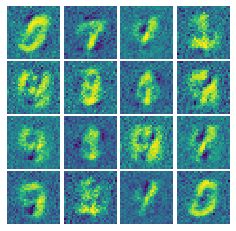


Iter: 1000
D loss: 0.8708
G_loss: 1.685



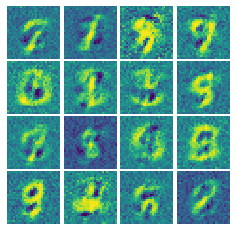


Iter: 2000
D loss: 1.104
G_loss: 1.565



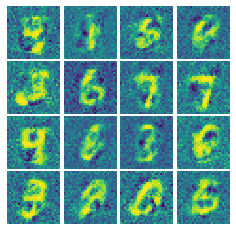


Iter: 3000
D loss: 1.137
G_loss: 1.512



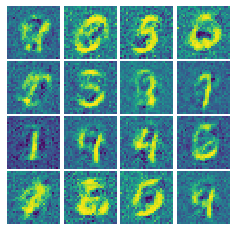


Iter: 4000
D loss: 0.949
G_loss: 1.239



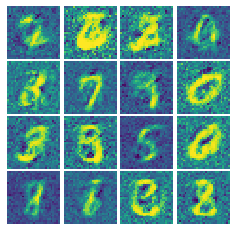


Iter: 5000
D loss: 1.014
G_loss: 1.387



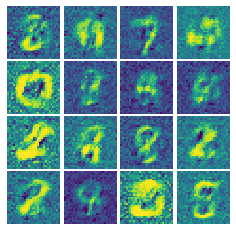


Iter: 6000
D loss: 1.185
G_loss: 1.485



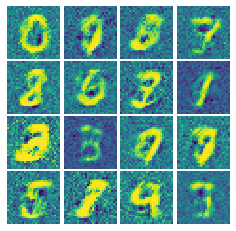


Iter: 7000
D loss: 1.094
G_loss: 1.215



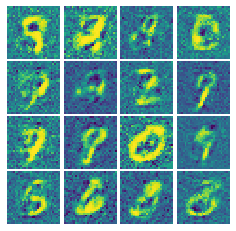


Iter: 8000
D loss: 1.067
G_loss: 1.241



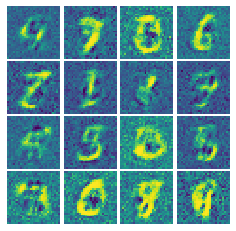


Iter: 9000
D loss: 0.9958
G_loss: 1.362



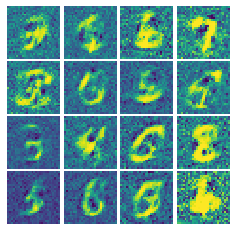


Iter: 10000
D loss: 0.9836
G_loss: 1.519



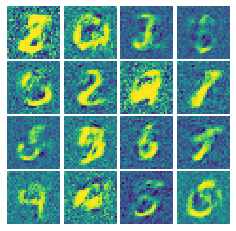


Iter: 11000
D loss: 1.242
G_loss: 1.242



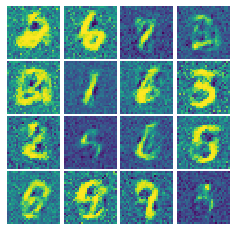


Iter: 12000
D loss: 1.051
G_loss: 1.514



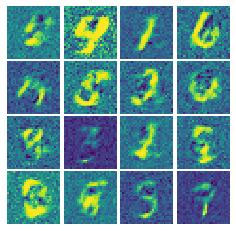


Iter: 13000
D loss: 0.8822
G_loss: 1.531



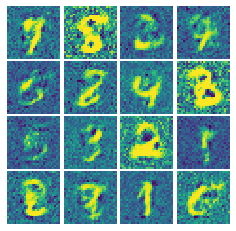


Iter: 14000
D loss: 1.123
G_loss: 1.32



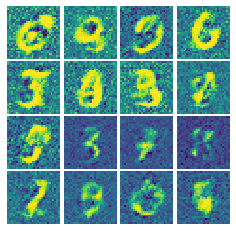


Iter: 15000
D loss: 0.9191
G_loss: 1.51



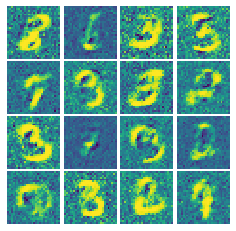


Iter: 16000
D loss: 0.9845
G_loss: 1.476



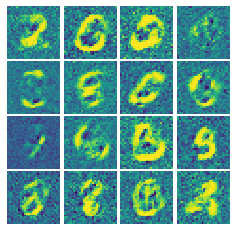


Iter: 17000
D loss: 1.045
G_loss: 1.483



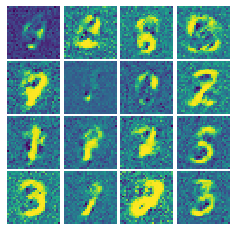


Iter: 18000
D loss: 0.7516
G_loss: 1.792



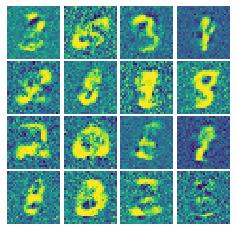


Iter: 19000
D loss: 0.9132
G_loss: 1.577



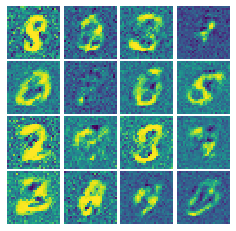


Iter: 20000
D loss: 0.8014
G_loss: 1.751



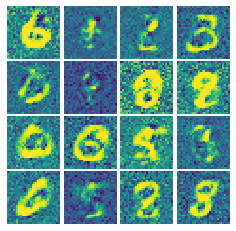


Iter: 21000
D loss: 0.8864
G_loss: 2.082



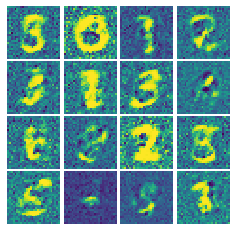


Iter: 22000
D loss: 0.8731
G_loss: 1.947



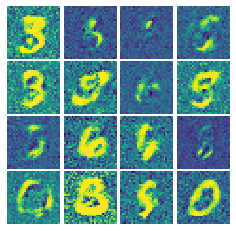


Iter: 23000
D loss: 0.7721
G_loss: 1.947



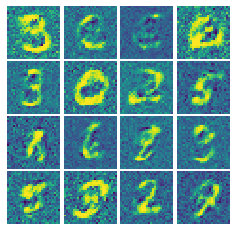


Iter: 24000
D loss: 0.7408
G_loss: 1.971



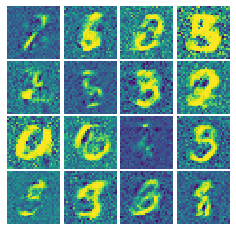


Iter: 25000
D loss: 0.7517
G_loss: 1.857



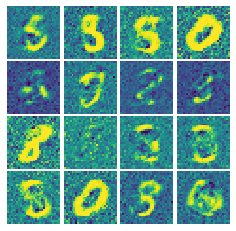


Iter: 26000
D loss: 0.7733
G_loss: 2.245



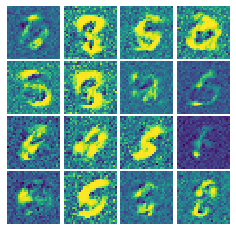


Iter: 27000
D loss: 0.6952
G_loss: 2.12



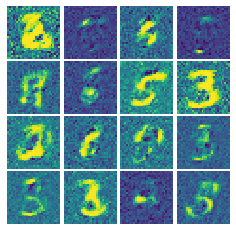


Iter: 28000
D loss: 0.7549
G_loss: 2.143



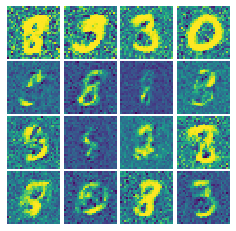


Iter: 29000
D loss: 0.5142
G_loss: 2.381



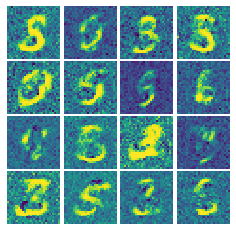


Iter: 30000
D loss: 0.6815
G_loss: 2.436



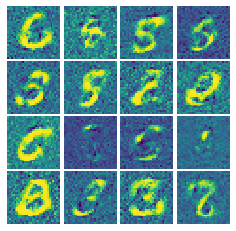


Iter: 31000
D loss: 0.5867
G_loss: 2.488



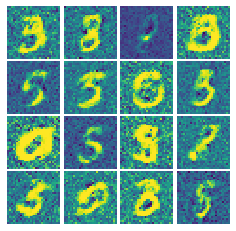


Iter: 32000
D loss: 0.6426
G_loss: 2.66



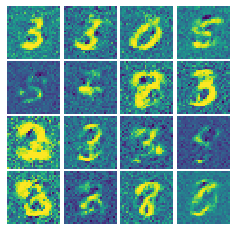


Iter: 33000
D loss: 0.581
G_loss: 2.563



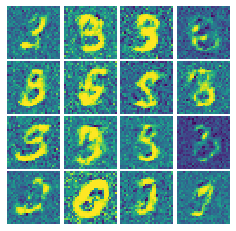


Iter: 34000
D loss: 0.5753
G_loss: 2.573



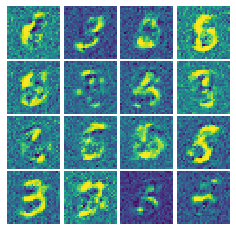


Iter: 35000
D loss: 0.545
G_loss: 2.571



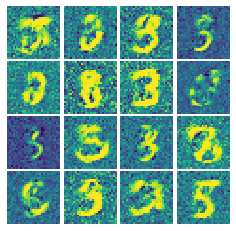


Iter: 36000
D loss: 0.5627
G_loss: 2.409



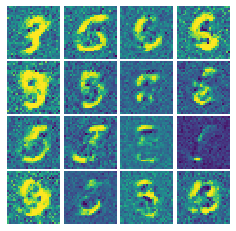


Iter: 37000
D loss: 0.4775
G_loss: 2.532



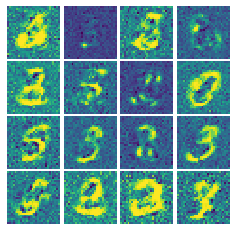


Iter: 38000
D loss: 0.4167
G_loss: 2.599



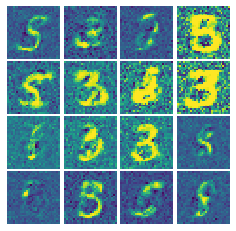


Iter: 39000
D loss: 0.4241
G_loss: 2.77



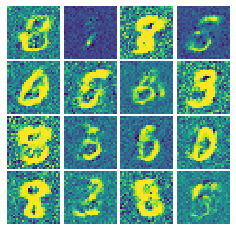


Iter: 40000
D loss: 0.4986
G_loss: 2.627



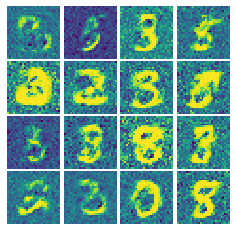


Iter: 41000
D loss: 0.5022
G_loss: 2.772



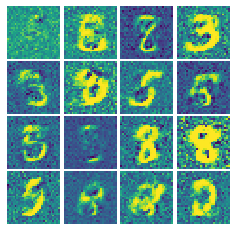


Iter: 42000
D loss: 0.6864
G_loss: 2.803



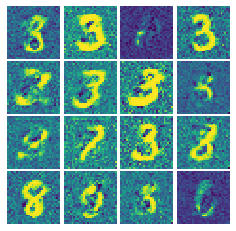


Iter: 43000
D loss: 0.4484
G_loss: 2.802



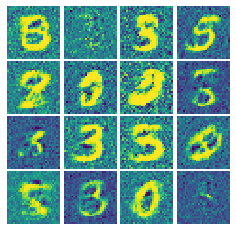


Iter: 44000
D loss: 0.5327
G_loss: 3.017



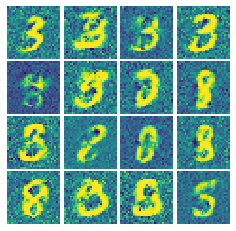


Iter: 45000
D loss: 0.5345
G_loss: 2.918



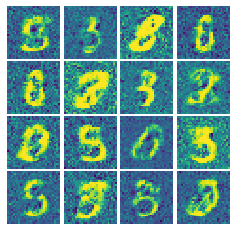


Iter: 46000
D loss: 0.6418
G_loss: 2.438



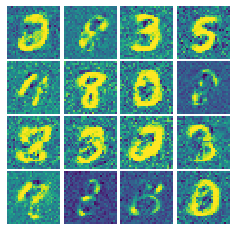


Iter: 47000
D loss: 0.4948
G_loss: 2.979



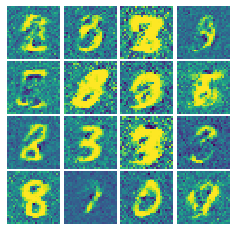


Iter: 48000
D loss: 0.56
G_loss: 2.915



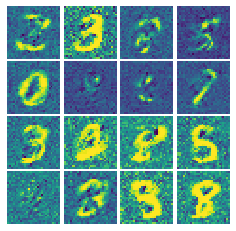


Iter: 49000
D loss: 0.5069
G_loss: 2.826



In [15]:
for it in range(50000):
    
    if it % 1000 == 0:
        samples = sess.run(G_sample,feed_dict={Z: sample_Z(128, 100)})
        fig = show_images(samples[:16])
        plt.show()
        print()
        
    x, _ = mnist.train.next_batch(128)
    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: x, Z: sample_Z(128, 100)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(128, 100)})
    
    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Final generated images


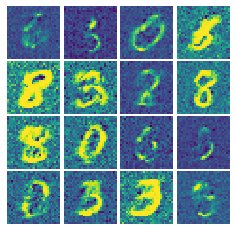

In [16]:
print("Final generated images")
samples = sess.run(G_sample,feed_dict={Z: sample_Z(128, 100)})
fig = show_images(samples[:16])
plt.show()
print()

PS: I only run for 50000 iterations since it's really hard to decide when to stop in GAN's